In [3]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import random

# target
x = np.linspace(-6,8,100)
p = [sts.norm.pdf(xi,-4,0.5) + sts.norm.pdf(xi,4,1) for xi in x]

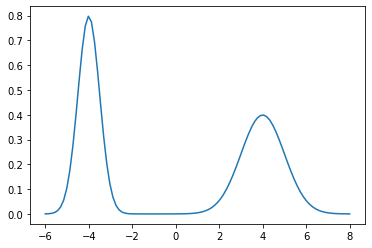

In [4]:
plt.plot(x,p)

In [5]:
def p_pdf(x):
    return(sts.norm.pdf(x,-4,0.5) + sts.norm.pdf(x,4,1))
    
def q_rvs(x0,e):
    return(sts.norm.rvs(x0,e**2))

def q_pdf(x,x0,e):
    return(sts.norm.pdf(x,x0,e**2))


def mh(x0,t,e):
    walk = [x0]
    for ti in range(t):
        x = walk[-1]
        xstar = q_rvs(x,e)
        arate = p_pdf(xstar)/p_pdf(x)*q_pdf(x,xstar,e)/q_pdf(xstar,x,e)
        arate = min(arate,1)
        if random.uniform(0, 1) <= arate:
            walk.append(xstar)
        else:
            walk.append(x)
    return(walk)

In [6]:
walk_eh = mh(0,1000,0.5)
walk_e1 = mh(0,1000,1)
walk_e2 = mh(0,1000,2)
walk_e4 = mh(0,1000,4)
walk_e10 = mh(0,1000,10)

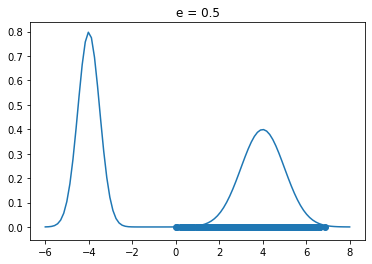

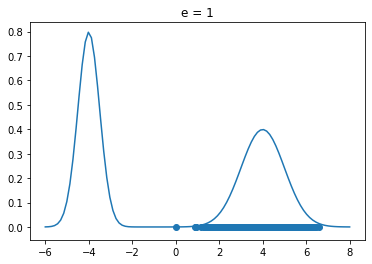

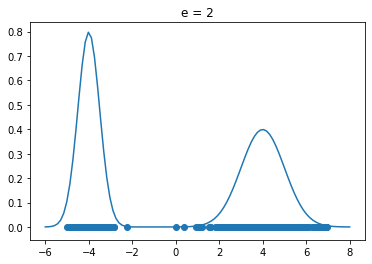

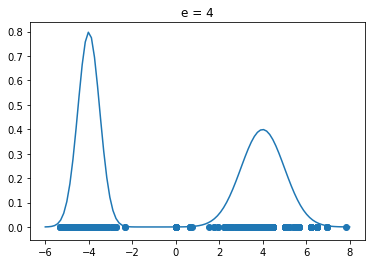

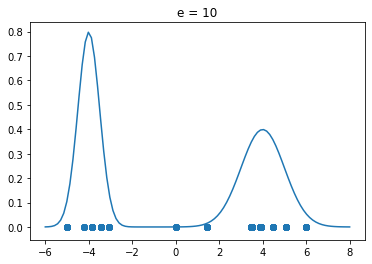

In [7]:
for e,title in [(walk_eh,"0.5"), (walk_e1,"1"),(walk_e2,"2"),(walk_e4,"4"),(walk_e10,"10")]:
    plt.plot(x,p);
    plt.scatter(e,[0 for _ in enumerate(e)]);
    plt.title("e = "+title);
    plt.show()

In [ ]:
# for lolz



In [46]:
from scipy import signal
import matplotlib.pyplot as plt

def plot_acf(x):
    '''
    Plot the autocorrelation function for a series x. This corresponds to the
    acf() function in R. The series x is detrended by subtracting the mean of
    the series before computing the autocorrelation.
    The autocorrelation at lag = 0 is always 1 since the series is perfectly
    correlated with itself. You can ignore this value. The autocorrelation at
    all other values should be as small as possible, since independent samples
    have no correlation.
    '''
    plt.acorr(
    x, maxlags=20, detrend=lambda x: signal.detrend(x, type='constant'))

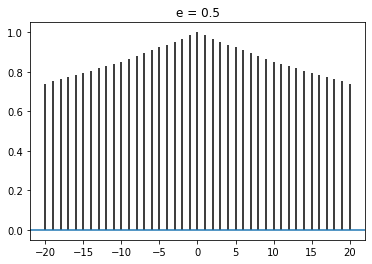

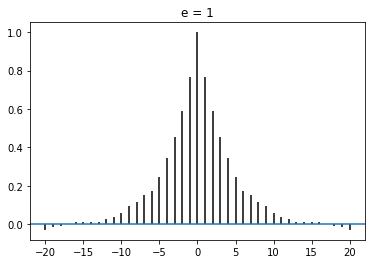

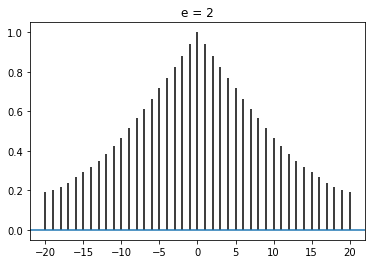

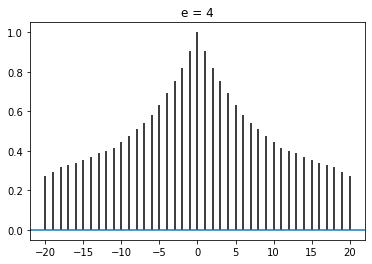

In [47]:
for e,title in [(walk_eh,"0.5"), (walk_e1,"1"),(walk_e2,"2"),(walk_e4,"4")]:
    plot_acf(e);
    plt.title("e = "+title);
    plt.show()